# EDA With Python and applying Logistic Regression

Source: Titanic data set from Kaggle, Very famous dataset and is used mostly in ML.
We will be trying to predict a classificatio-survival or deceased

Dataset: 

Using here  a semi-cleaned version of the python dataset. If you use the dataset dirctly from kaggle, u need to make some changes.

In [150]:
import numpy as np
# (Used to work with arrays multi or single dimensional arrays)
import pandas as pd
# (Reading dataset and preporcessing)
import matplotlib.pyplot as plt
# (Visualisation)
import seaborn as sns
# (Visualisation, statstical functions)
%matplotlib inline
# (Need not to write plt.show() evry time we need to print a visualisation graph)

In [151]:
train=pd.read_csv('titanic_train.csv')

In [152]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

#### Problem Statement: Same as Titanic Movie, whether the passenger has survived or not!

## MISSING DATA

In [155]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

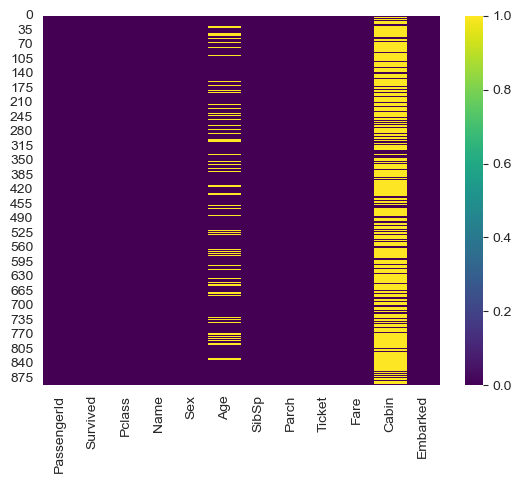

In [156]:
sns.heatmap(train.isnull(),cbar=True,xticklabels=True,cmap='viridis')
# other than the data, all other parameters are secondary

In [157]:
# The above heatmaop shows that the yellow color is the missing values, so we will take cares of the Nan values by various techniques

Let's continue on by visualizing some more of the data! 

change it to another feature like "Cabin Known: 1 or 0"
Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

<Axes: xlabel='Survived', ylabel='count'>

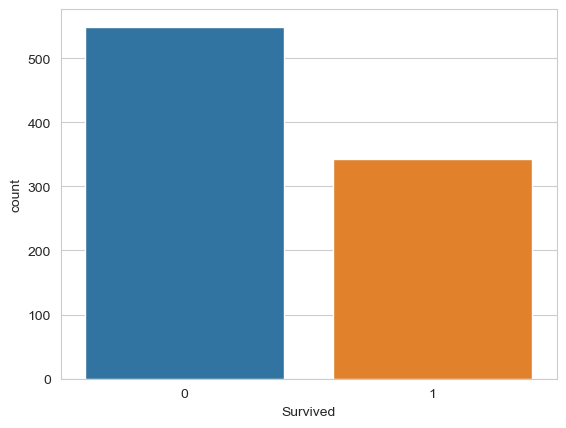

In [159]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

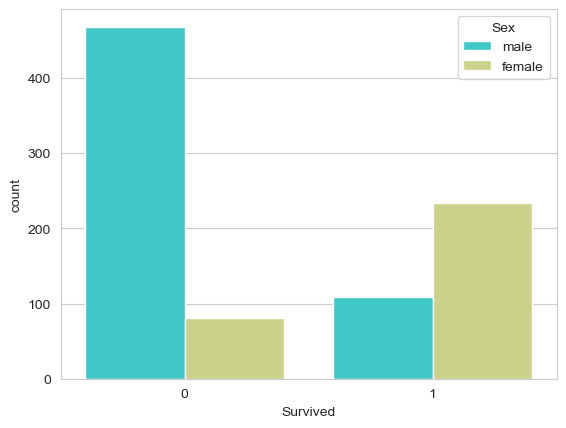

In [160]:
sns.countplot(x='Survived', data=train, hue='Sex',palette='rainbow')

In [161]:
train['Pclass'] = train['Pclass'].astype(str)
Pclass=train['Pclass']

<Axes: xlabel='Survived', ylabel='count'>

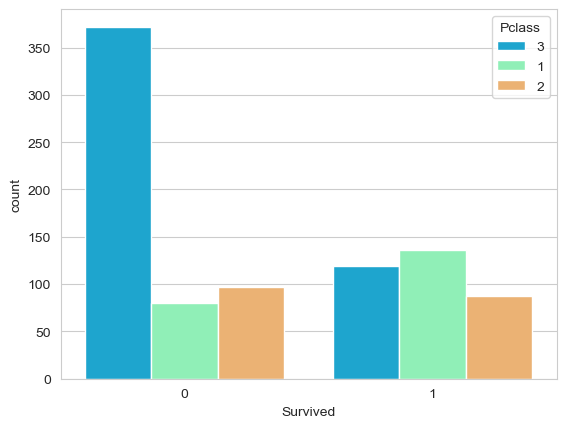

In [162]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [163]:
# KDE (Kernel Density Estimation) is used for efficient visualization of probability density functions,
# especially in statistical libraries like Seaborn and Matplotlib

C:\Users\NavalSehgal\AppData\Local\Temp\ipykernel_5056\2002818437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

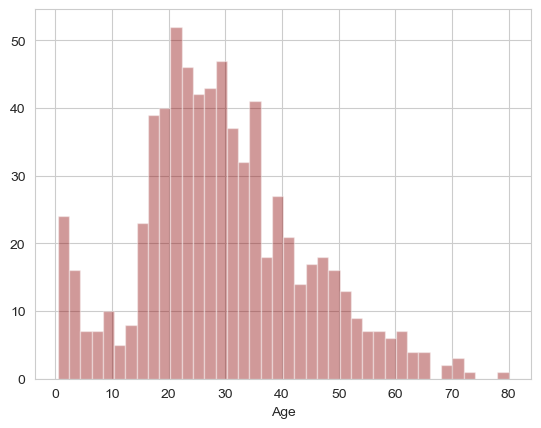

In [164]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

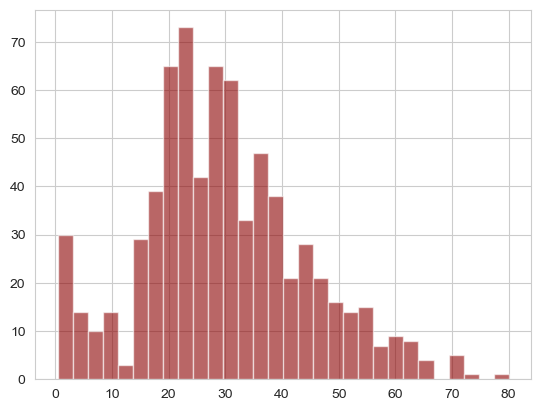

In [165]:
train['Age'].hist(color='darkred',bins=30,alpha=0.6)
# alpha is colord density

<Axes: xlabel='SibSp', ylabel='count'>

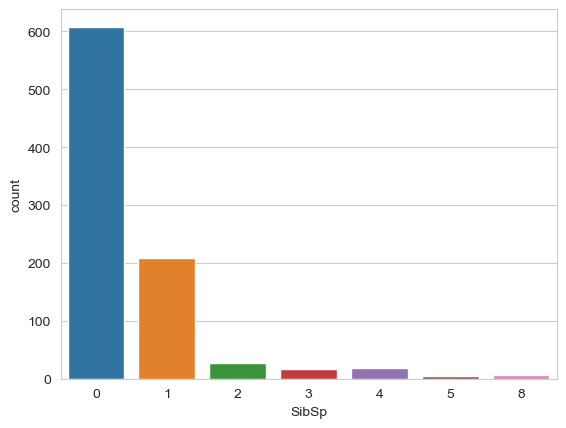

In [166]:
sns.countplot(x='SibSp',data=train)

<Axes: >

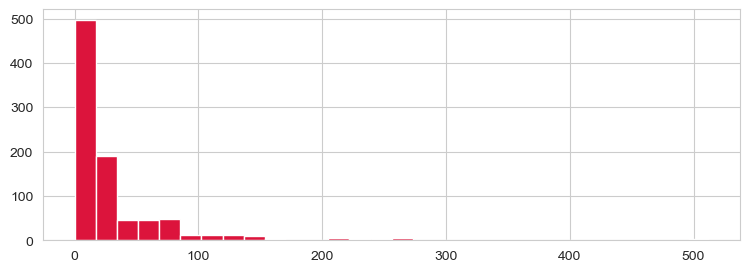

In [167]:
train['Fare'].hist(color='crimson',bins=30,figsize=(9,3))

# Data Cleaning

We want to fill the missing age instead of just dropping them. One way is to fill their mean of all the passengers(imputation).
We can check the average by passenger class, if we be smart.

<Axes: xlabel='Pclass', ylabel='Age'>

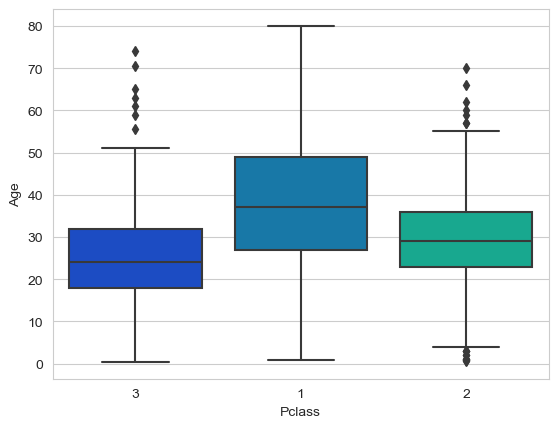

In [169]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [170]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age



In [171]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\NavalSehgal\AppData\Local\Temp\ipykernel_5056\3013878114.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\NavalSehgal\AppData\Local\Temp\ipykernel_5056\3013878114.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


In [172]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: >

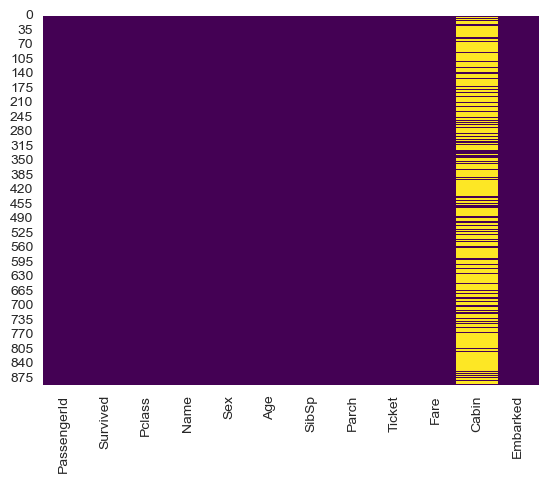

In [173]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [174]:
train.drop('Cabin',axis=1,inplace=True)

In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

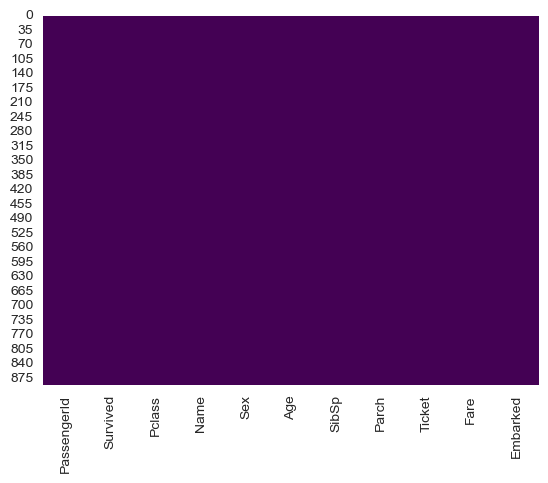

In [176]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

# Converting Categorical Features

Coverting categorical features to dummy variables using Pandas

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [179]:
train.dropna(inplace=True)

In [180]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [181]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex = sex.astype(int)

In [182]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
embarked = embarked.astype(int)

In [183]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [223]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [185]:
train=pd.concat([train,sex,embarked],axis=1)

In [221]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Model

In [247]:
train.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [251]:
survived=train['Survived']

In [241]:
from sklearn.model_selection import train_test_split

In [253]:
X_train, X_test, y_train, y_test=train_test_split(train.drop('Survived',axis=1),survived,test_size=0.30,random_state=101)

# Training And Predicting

In [256]:
from sklearn.linear_model import LogisticRegression

In [262]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\NavalSehgal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [266]:
predictions=logmodel.predict(X_test)

In [268]:
from sklearn.metrics import confusion_matrix

In [272]:
accuracy=confusion_matrix(y_test,predictions)

In [274]:
from sklearn.metrics import accuracy_score

In [278]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8014981273408239

In [280]:
# ALTERNATIVE


# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split

# # Assuming X and y are your features and target variables
# X = train.drop('Survived', axis=1)
# y = train['Survived']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# # Create a pipeline that scales the data and then applies logistic regression
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logistic_regression', LogisticRegression(max_iter=200))  # Increase max_iter as needed
# ])

# # Fit the model
# pipeline.fit(X_train, y_train)

# # Check the score on the test set
# score = pipeline.score(X_test, y_test)
# print("Test set accuracy:", score)
